# Digit Recognition using Keras based on MNIST Data 

Data Source : https://www.kaggle.com/c/digit-recognizer/data

Inspired by : https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6



In [49]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Keras Deep Learning Libraries
from keras.models import Sequential
from keras.optimizers import Adam,RMSprop
from keras.layers import Dense,Dropout,Lambda,Flatten,Conv2D,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Train Test Split

from sklearn.model_selection import train_test_split



In [26]:
# Loading the Train Dataset as df_train
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_2689622d3bb44c6295e7bc1d0783dde4(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_27f432c403a506fc9b89694a383d87f4282a96de','domain': {'id': 'ce9588cdb66f4bc8889c950585780ce9'},
            'password': 'l^R6K]-EMg&56c[/'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_train = pd.read_csv(get_object_storage_file_with_credentials_2689622d3bb44c6295e7bc1d0783dde4('DefaultProjectnchellaminibmcom', 'train_MNIST.csv'))
df_train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# loading the test data set as df_test
df_test = pd.read_csv(get_object_storage_file_with_credentials_2689622d3bb44c6295e7bc1d0783dde4('DefaultProjectnchellaminibmcom', 'test_MNIST.csv'))
df_test.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Dropping the label column in train and naming it as x train and label colun to be considered a Y value

Y_train=df_train['label']
Y_train.head()

X_train=df_train.drop(labels = ["label"],axis=1)
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# we can now delete some table space by remiving df_train 

del df_train

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


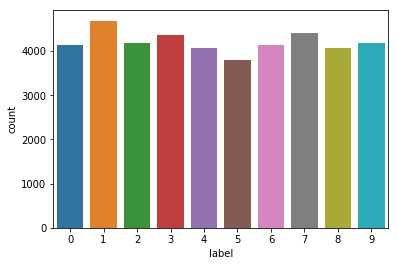

In [30]:
sns.countplot(Y_train)

In [31]:
# getting the count of unique values in the train data
Y_train.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [32]:
# Getting the count of individual labels
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [33]:
# Checking for null values to ensure no null values
Y_train.isnull().sum()

0

In [34]:
# Converting the data to Grayscale data by normalization technique to reduce illumation diff.. im unsure of this specific
# need as im following Yassine Ghouzam-Introduction to CNN Keras - 0.997 (top 6%) Kernel..

X_train=X_train/255.0

df_test = df_test/255.0




In [35]:
#  Each image is stored in a single line in the train data set and we need to convert it into a matrix
# shape for processing, (1#,2#,3#,4#) 1# represent batch size which could be -1 and 2# and 3 # represents
# Height and width of the image pixels

X_train=X_train.values.reshape(-1,28,28,1)

In [36]:
df_test=df_test.values.reshape(-1,28,28,1)

In [38]:
from keras.utils.np_utils import to_categorical # to convert values to one hot encoding

In [39]:
# now the labels in Y_train are digits from 0 to 9, we need to convert it into binary format using one hot encoding approach

Y_train = to_categorical(Y_train,num_classes=10)

In [41]:

# Using Train test split to split the data as train and test sets
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=2)

In [42]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


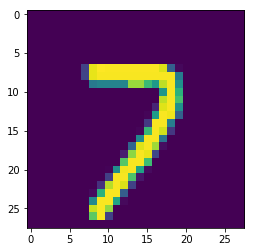

In [46]:
a=plt.imshow(x_train[5][:,:,0])

##  Adding the Keras Deep Learning Layer with CNN


In [51]:
# In this model, i have implemented the same model implemented by Yassine, i will try
# other model types below

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',
                 activation = 'relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',
                 activation = 'relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [52]:
# We need to now set the optimizer for the model..

optimizer = RMSprop(lr=0.001,rho=0.9,epsilon=1e-08,decay=0.0)

In [53]:
# now we need to compile the model using the compile option

model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])



In [54]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [55]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [56]:
# This model trains based on the x_train and y_train data 
M1 = model.fit(x_train,y_train,batch_size=86,epochs=1,validation_data=(x_test,y_test),verbose=2)

Train on 29400 samples, validate on 12600 samples
Epoch 1/1
42s - loss: 0.2878 - acc: 0.9077 - val_loss: 0.0630 - val_acc: 0.9798


In [57]:
# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/keras/preprocessing/image.py:648: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (29400, 28, 28, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


In [59]:
M2 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/1
42s - loss: 0.2188 - acc: 0.9335 - val_loss: 0.0572 - val_acc: 0.9819
